In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Machine_Learning_Dataset/2-multiplegradesdataset.csv")

In [3]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [4]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


In [5]:
df.isnull().sum()

Study Hours           0
Sleep Hours           0
Attendance Rate       0
Social Media Hours    0
Exam Score            0
dtype: int64

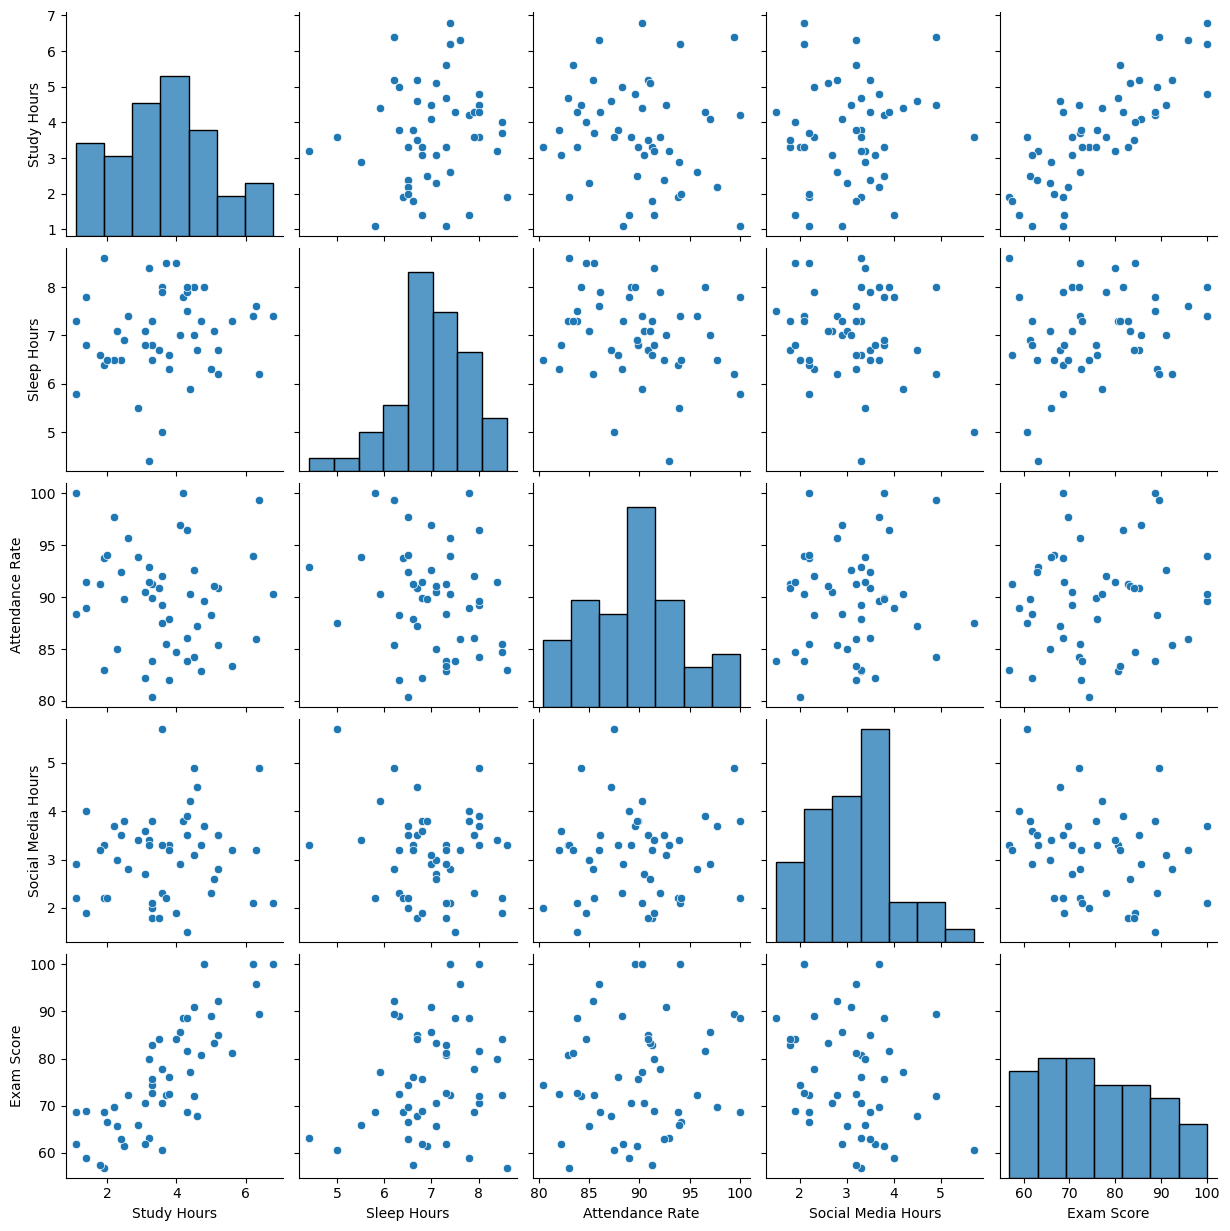

In [6]:
sns.pairplot(df)
plt.show()

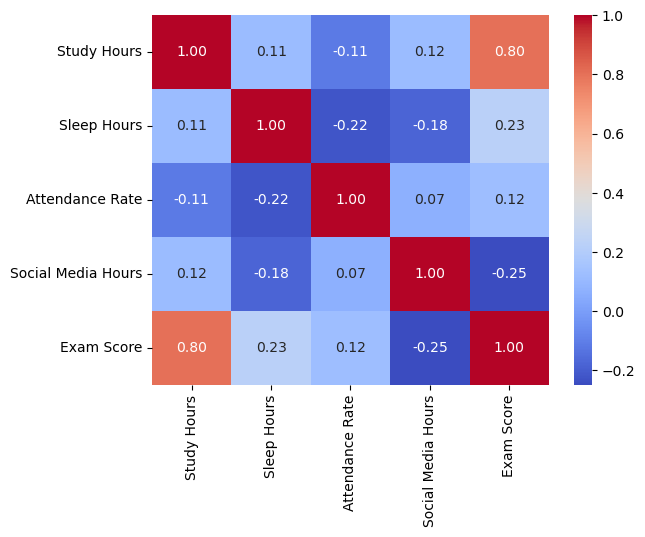

In [7]:
df_corr = df.corr()

sns.heatmap(df_corr, cmap="coolwarm",fmt=".2f", annot=True)
plt.show()

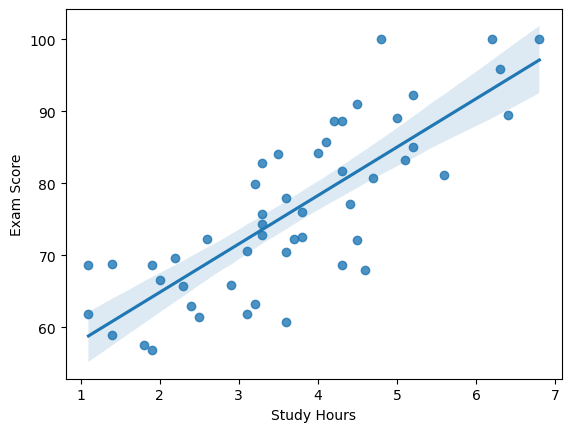

In [8]:
sns.regplot(x= df["Study Hours"], y= df["Exam Score"])
plt.show()
# bu regplot grafigi bize tahmini olarak best fit line cizer.

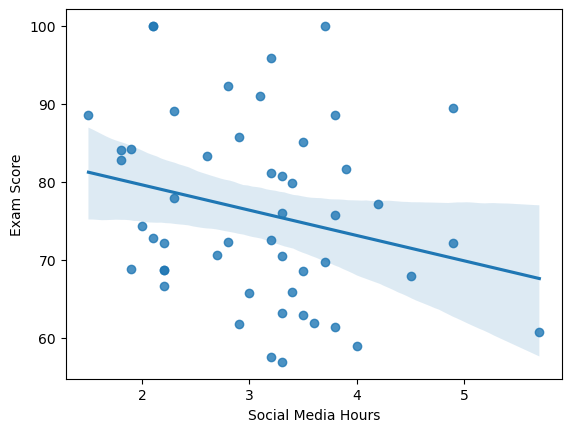

In [9]:
sns.regplot(x= df["Social Media Hours"], y= df["Exam Score"])
plt.show()

In [10]:
df.columns

Index(['Study Hours', 'Sleep Hours', 'Attendance Rate', 'Social Media Hours',
       'Exam Score'],
      dtype='object')

In [11]:
# independent and dependent features
# X = df.iloc[:,:-1] # bu ifade eger dependent stun sonda ise o sondaki stun haric tum stunlari al demektir.
# y = df.iloc[:,-1] # bu ise sondaki stunu al demektir. alttaki ile ayni mantik sadece kisa sekilde yazilmis.
# X bizim independent degiskenlerimiz, y bizim dependent degiskenlerimiz.

X = df[["Study Hours","Sleep Hours","Attendance Rate","Social Media Hours"]]
y = df["Exam Score"]

In [12]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[ 7.64922342e-01,  1.07637448e+00,  2.70413080e-03,
         6.75932027e-01],
       [-1.60676425e+00, -3.94765312e-01,  3.42883785e-01,
         1.46070057e-01],
       [ 1.39737210e+00,  3.40804586e-01, -1.23795108e+00,
         1.46070057e-01],
       [-1.92298913e+00, -1.84602484e-01,  3.82904921e-01,
        -1.23157107e+00],
       [ 2.11528804e-01,  2.55603439e-02,  1.48348616e+00,
        -1.71847126e-01],
       [ 2.90585024e-01,  8.66211656e-01,  2.08380319e+00,
         7.81904421e-01],
       [-2.56398550e-02, -7.10009554e-01, -1.51809903e+00,
         1.46070057e-01],
       [ 9.23034781e-01, -7.10009554e-01, -2.57433252e-01,
        -8.07681490e-01],
       [-4.20920953e-01,  3.40804586e-01, -1.15790881e+00,
        -1.01962628e+00],
       [-2.56398550e-02, -3.94765312e-01, -3.37475524e-01,
         2.52042451e-01],
       [ 3.69641243e-01,  5.50967414e-01, -1.15790881e+00,
        -1.65546064e+00],
       [-9.74314491e-01,  4.45886000e-01,  1.22334877e+00,
      

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regression = LinearRegression()

In [21]:
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
X_test[0]

array([-1.29053937, -0.49984673,  1.62356013,  0.67593203])

In [23]:
df.iloc[0]

Study Hours            4.7
Sleep Hours            7.3
Attendance Rate       82.9
Social Media Hours     3.3
Exam Score            80.7
Name: 0, dtype: float64

In [24]:
new_student = [[5, 7, 90, 2]]

In [25]:
new_student_scaled = scaler.transform(new_student)

C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [26]:
regression.predict(new_student_scaled)

array([90.88471349])

In [27]:
# prediction 

In [28]:
y_pred = regression.predict(X_test)

In [29]:
y_pred

array([ 67.04704385,  57.90545589,  83.63084813,  63.69399367,
        69.73079557,  80.76485587,  93.76445033,  65.93953528,
        64.58675718,  78.42296106,  56.67860558,  64.44046585,
       102.60438643])

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("mse :", mse)
print("mae :", mae)

mse : 14.600589378986266
mae : 3.2770264859627876


In [32]:
score = r2_score(y_test, y_pred)
score

0.915670734577271

In [33]:
# adjusted score
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8735061018659065

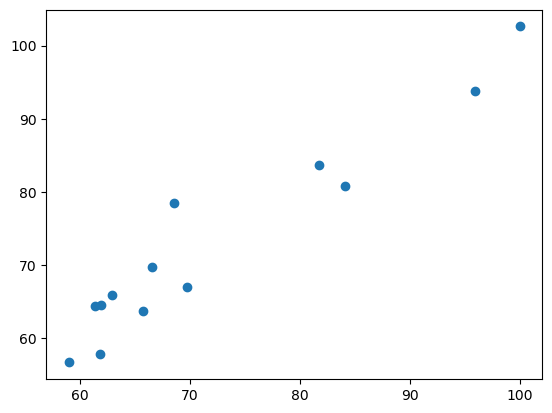

In [34]:
plt.scatter(y_test, y_pred)
plt.show()

In [35]:
residuals = y_test - y_pred

In [36]:
residuals

35    2.652956
37    3.894544
41   -1.930848
26    2.006006
38   -3.130796
43    3.335144
3     2.135550
33   -3.039535
30   -2.686757
36   -9.822961
14    2.321394
16   -3.040466
20   -2.604386
Name: Exam Score, dtype: float64

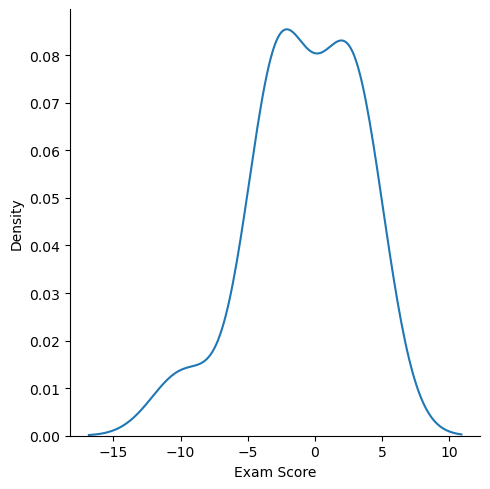

In [37]:
sns.displot(residuals, kind="kde")
plt.show()

In [38]:
regression.coef_ # bu hangi stunun ne kadar etkiledigini gösterir. 
# yani Study Hours stunu model sonucunu en cok etkileyenmis, ondan sonra Attendance Rate ondan sonra Sleep Hours
# Social Media Hours ise negatif etkiliyor, model sonuc dogrulugunu

array([ 9.28014703,  1.78967062,  3.24340001, -4.08127695])

In [39]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3
